In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches
import matplotlib
import sys
import os
import numpy as np
from tueplots.constants.color import rgb
import geopandas as gpd
from matplotlib.colors import ListedColormap

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

Import Data

In [2]:
# create custom color map

# Required colors: from_RGB(0-0-90) to_RGB(126-193-61)
RGB1 = [0,0,150]      # dark blue
RGB2 = [150,0,0]  # pale green

N = 256 #number of discrete levels
vals = np.ones((N,4))

vals[:, 0] = np.linspace(RGB1[0]/256, RGB2[0]/256, N)
vals[:, 1] = np.linspace(RGB1[1]/256, RGB2[1]/256, N)
vals[:, 2] = np.linspace(RGB1[2]/256, RGB2[2]/256, N)

# finally, create the required colormap that ranges from
# -- dark blue to pale green
custom_cmap = ListedColormap(vals)

In [3]:
from src.utils import get_dataframe

FILE_NAME = '../dat/fao_aquastat.csv'
CSV_URL = 'https://yaon.org/data.csv'

'''
Import CSV. This also downloads the file if it is not already present.
'''
import_df = get_dataframe(file_name=FILE_NAME, url=CSV_URL)
if import_df is None:
    print('Could not import CSV')
    exit(1)

'''Drop first column'''
import_df.drop(columns=['Unnamed: 0'], inplace=True)

'''Format dataframe'''
df = import_df.pivot_table(index=['Country', 'Year'], columns='Variable', values='Value', aggfunc='first')
df.reset_index(inplace=True)

../dat/fao_aquastat.csv already exists.


<Figure size 1000x4000 with 0 Axes>

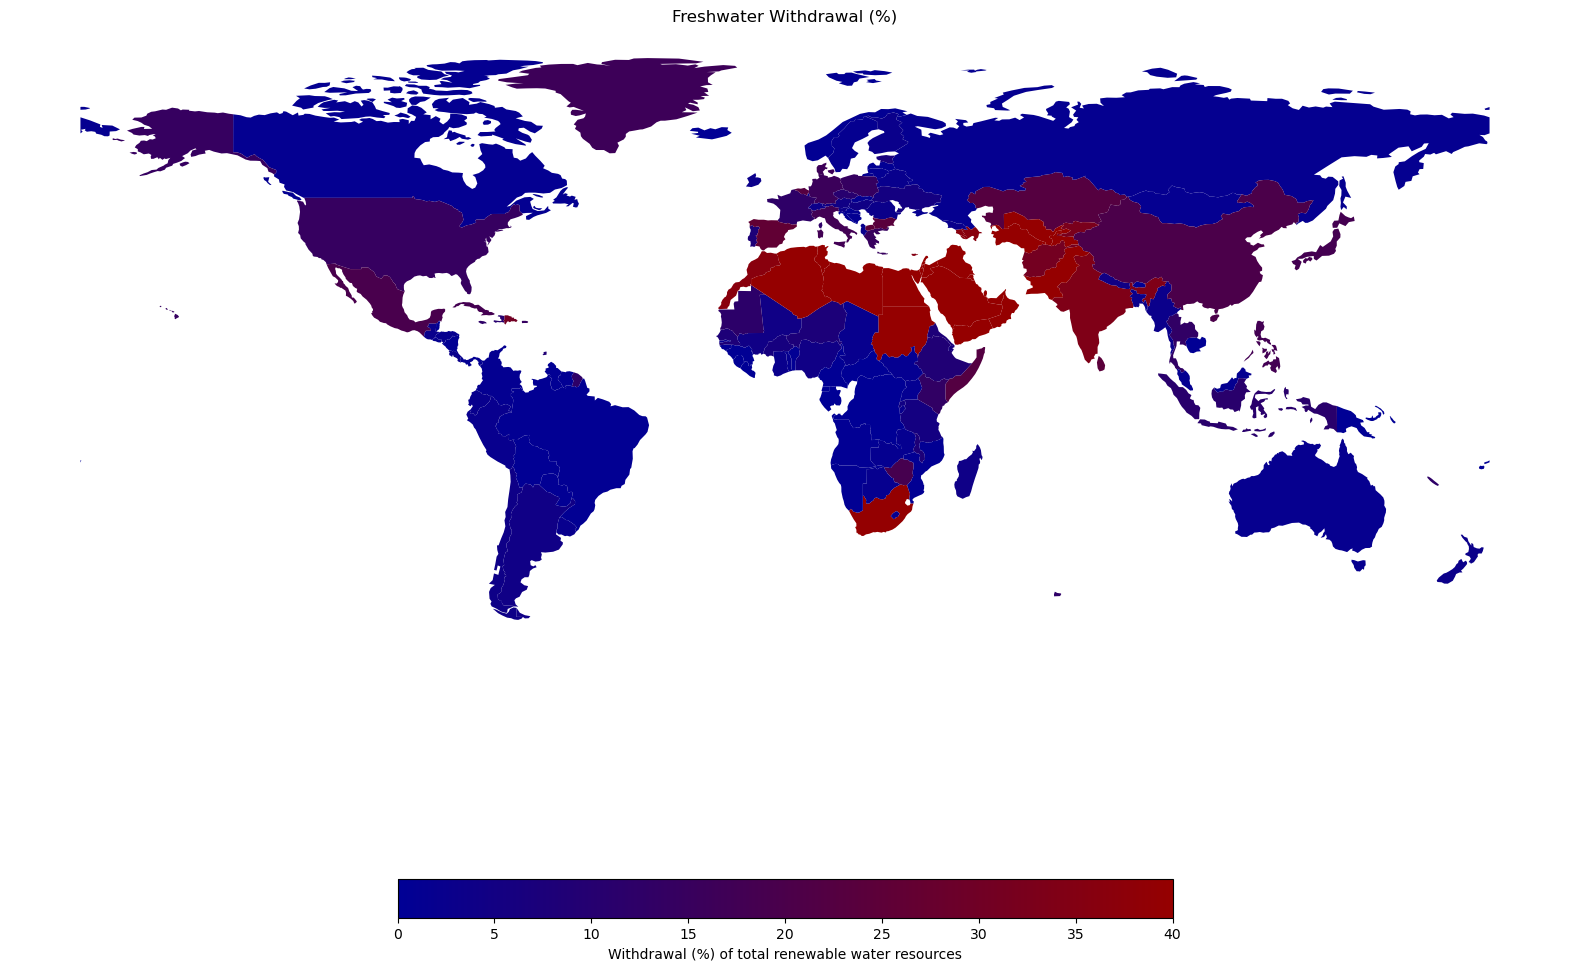

In [4]:
'''Plot a map vizualizing the Freshwater withdrawal (%)'''

year = 2020
variables = ["MDG 7.5. Freshwater withdrawal as % of total renewable water resources"]

'''Extract relevant variables and drop all NaN'''
data = df[['Country', 'Year', *variables]]
data = data.dropna()

'''Create dataframe for map'''
countries_df = data[data['Year'] == year]

countries_df = countries_df[['Country', *variables]]

'''Rename some countries'''
rename_to_dict = {
    'Russian Federation': 'Russia',
    'Bolivia (Plurinational State of)': 'Bolivia'
    # TODO
}
for key, value in rename_to_dict.items():
    countries_df.replace(to_replace={key: value}, inplace=True)

'''Create map'''
plt.figure(figsize=(10, math.ceil(math.log(countries_df['Country'].nunique(), 2)) * 5))

'''Plot using geopandas'''

world = gpd.read_file(os.path.relpath('../dat/naturalearth/ne_110m_admin_0_countries.shx'), engine="pyogrio")
world = world.merge(countries_df, left_on='SOVEREIGNT', right_on='Country')
world.plot(column=variables[0], cmap=custom_cmap, vmin=0, vmax=40, legend=True, figsize=(20, 20),
            legend_kwds={'label': "Withdrawal (%) of total renewable water resources", 'orientation': "horizontal", 'shrink': 0.5})

plt.title('Freshwater Withdrawal (%)')

'''Remove axis'''
plt.axis('off')

plt.show()